In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


df = pd.read_csv('train.csv')

#Drop non-numeric columns except the target column
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols.remove('track_genre')  # Keep the target column
df.drop(columns=non_numeric_cols, inplace=True)

#Drop missing values
df.dropna(inplace=True)

#Encode the target column
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

#Split features and target
X = df.drop(columns=['track_genre'])
y = df['track_genre']

#Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

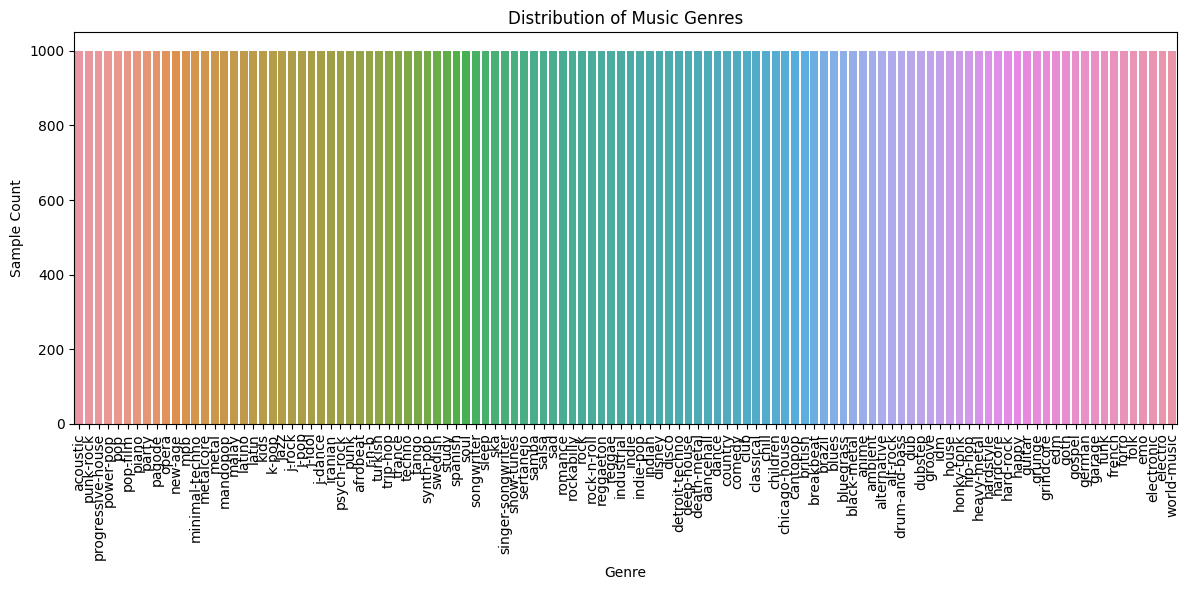

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


genre_counts = df['track_genre'].value_counts()
genre_names = label_encoder.inverse_transform(genre_counts.index)

#Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_names, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Sample Count')
plt.tight_layout()
plt.savefig('distribution_of_music_genres.png', dpi=300)
plt.show()


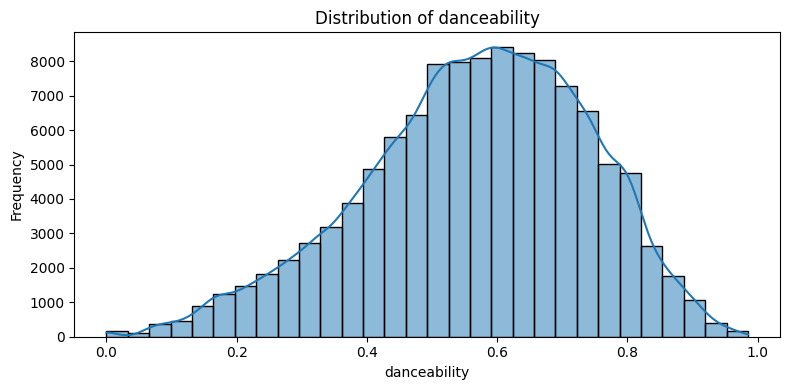

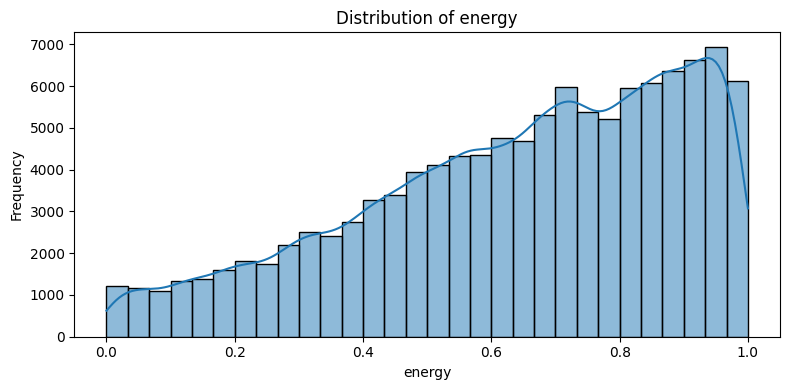

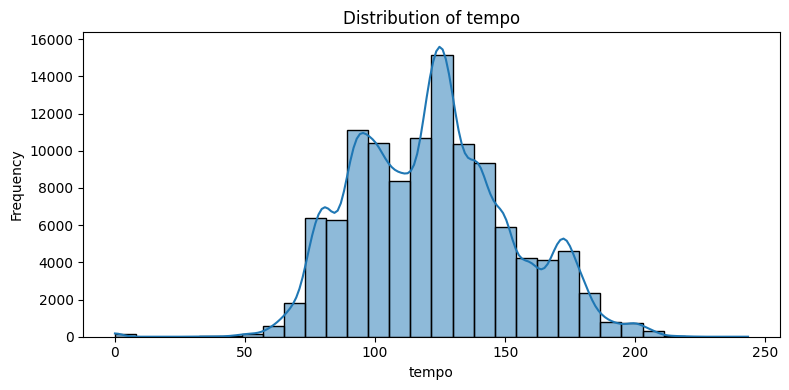

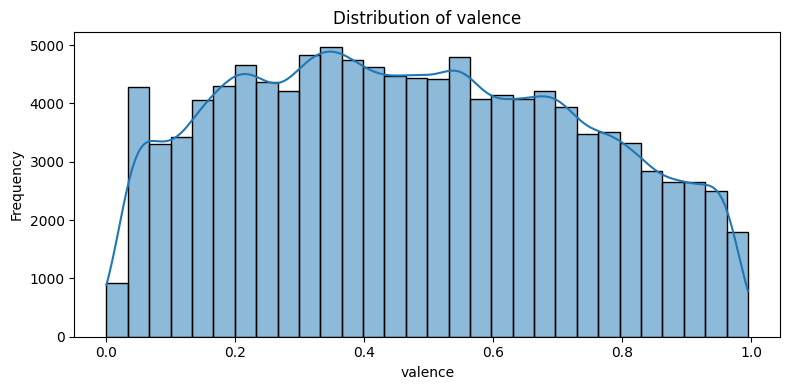

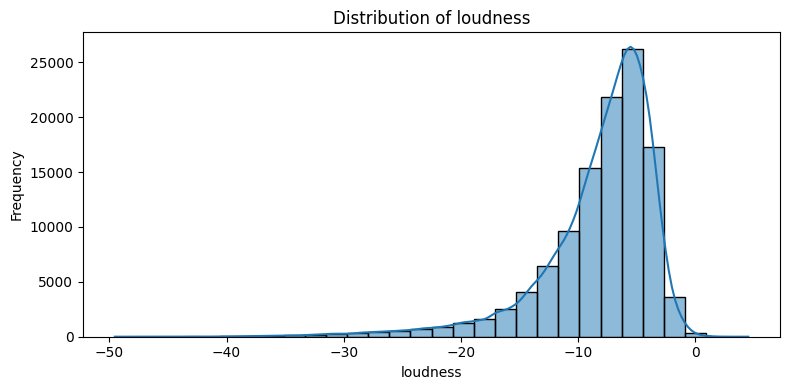

In [3]:
#Select numeric features
numeric_features = ['danceability', 'energy', 'tempo', 'valence', 'loudness']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'distribution_{feature}.png', dpi=300)
    plt.show()


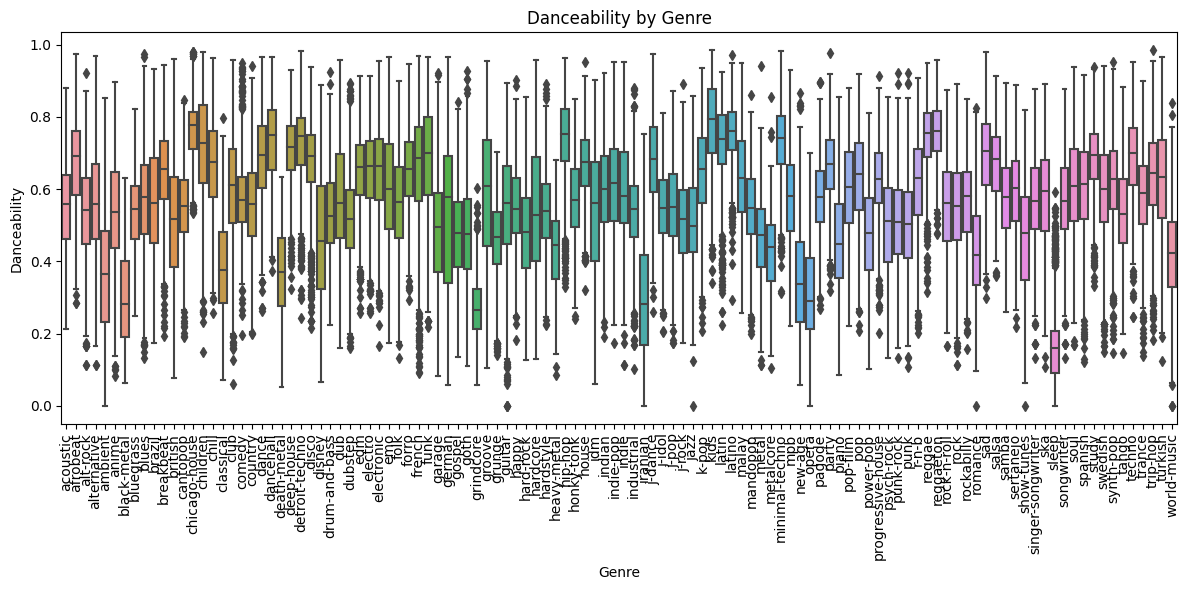

In [4]:
df['genre_label'] = label_encoder.inverse_transform(df['track_genre'])

feature = 'danceability'

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_label', y=feature, data=df)
plt.xticks(rotation=90)
plt.title(f'{feature.capitalize()} by Genre')
plt.xlabel('Genre')
plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.savefig(f'boxplot_{feature}_by_genre.png', dpi=300)
plt.show()


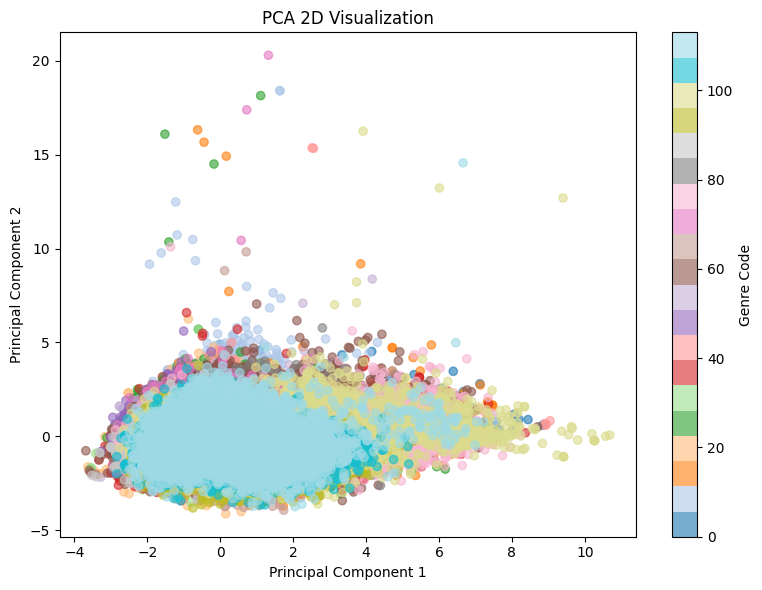

In [5]:
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20', alpha=0.6)
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Genre Code')
plt.tight_layout()
plt.savefig('pca_2d_visualization.png', dpi=300)
plt.show()
